In [1]:
import os
import pandas as pd 
import math
import numpy as np 
import matplotlib.pyplot as plt
import random as r 
import glob
import seaborn as sns
sns.set()
pd.options.mode.chained_assignment = None  # default='warn'

In [7]:
simfilepath = "/mnt/c/Users/llave/Downloads/batch_brutus9_1.csv"
df = pd.read_csv(simfilepath)

In [8]:
df.head()

,Unnamed: 0,eventID,m1,m2,m3,x1,x2,x3,y1,y2,...,x3f,y1f,y2f,y3f,vx1f,vx2f,vx3f,vy1f,vy2f,vy3f
0,1.0,10001.0,84.270385,56.314115,52.279696,-2.226488,-3.406637,9.440128,-3.887835,-4.902674,...,9.442821,-3.888589,-4.899092,-2.849904,0.457428,-0.525155,0.687588,-0.222422,0.961199,-0.100621
1,1.0,10002.0,84.270385,56.314115,52.279696,-2.226488,-3.406637,9.440128,-3.887835,-4.902674,...,9.445500,-3.889573,-4.895165,-2.850298,0.389737,-0.420452,0.683916,-0.281080,1.049364,-0.101038
2,1.0,10003.0,84.270385,56.314115,52.279696,-2.226488,-3.406637,9.440128,-3.887835,-4.902674,...,9.448164,-3.890785,-4.890894,-2.850693,0.321736,-0.315285,0.680246,-0.339542,1.137235,-0.101454
3,1.0,10004.0,84.270385,56.314115,52.279696,-2.226488,-3.406637,9.440128,-3.887835,-4.902674,...,9.450814,-3.892225,-4.886281,-2.851090,0.253345,-0.209536,0.676576,-0.397869,1.224904,-0.101870
4,1.0,10005.0,84.270385,56.314115,52.279696,-2.226488,-3.406637,9.440128,-3.887835,-4.902674,...,9.453450,-3.893893,-4.881325,-2.851489,0.184487,-0.103088,0.672908,-0.456125,1.312466,-0.102286


In [27]:
index = 10000
edf = df.loc[(df['eventID'] >= index) & (df['eventID'] <= (index+2560))]
print(edf.shape)

(2560, 30)


In [43]:
df_div = pd.DataFrame()
df_good = pd.DataFrame()
n_div = 0
for i in range(280):
    index_i = i*10000
    index_f = i*10000+2560
    event_pdf = df.loc[(df['eventID'] >= index_i) & (df['eventID'] <= (index_f))]
    if(event_pdf.shape[0]<2560):
        n_div+=1
        df_div = pd.concat([df_div,event_pdf])
    else:
        df_good = pd.concat([df_good,event_pdf])
print(n_div)
print(df_div.shape)

45
(37117, 30)


(array([0.0463898 , 0.11597451, 0.30153371, 0.41750822, 0.61466488,
        0.49869037, 0.39431332, 0.17396176, 0.08118215, 0.08118215]),
 array([1.266681 , 1.6335995, 2.000518 , 2.3674365, 2.734355 , 3.1012735,
        3.468192 , 3.8351105, 4.202029 , 4.5689475, 4.935866 ]),
 <a list of 10 Patch objects>)

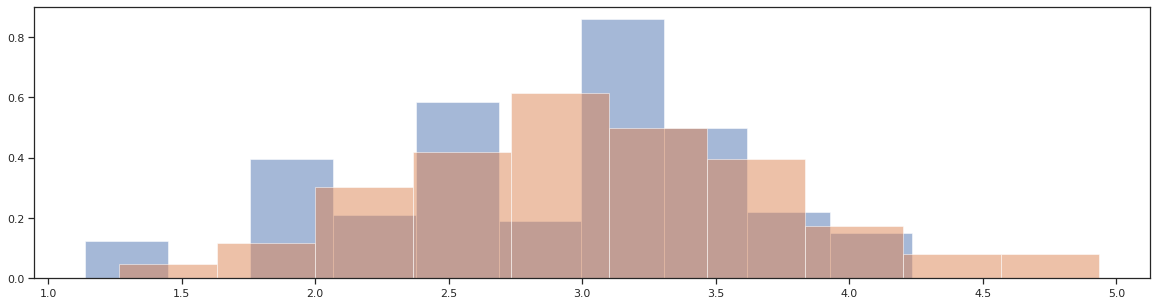

In [69]:
plt.hist(abs(df_div['vx1'])+abs(df_div['vx2'])+abs(df_div['vx3'])+abs(df_div['vy1'])+abs(df_div['vy2'])+abs(df_div['vy3']),density=1,alpha=0.5)
plt.hist(abs(df_good['vx1'])+abs(df_good['vx2'])+abs(df_good['vx3'])+abs(df_good['vy1'])+abs(df_good['vy2'])+abs(df_good['vy3']),density=1,alpha=0.5)

(array([1.17817270e-03, 4.03973911e-03, 1.35232854e-03, 2.13822789e-03,
        1.57585671e-04, 1.93600422e-03, 1.59344138e-03, 5.07250013e-06,
        1.69083338e-06, 1.49469671e-04]),
 array([ 31.15521859, 110.82549522, 190.49577184, 270.16604847,
        349.83632509, 429.50660172, 509.17687834, 588.84715497,
        668.51743159, 748.18770822, 827.85798484]),
 <a list of 10 Patch objects>)

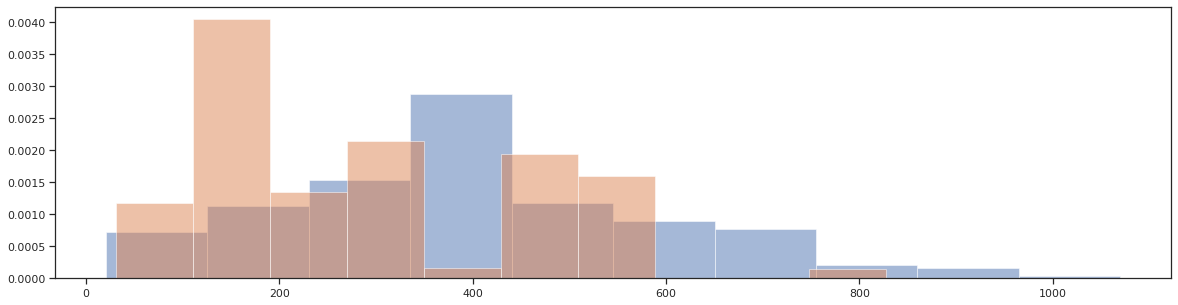

In [79]:
diff12 = (df_good["x1"]-df_good["x2"])**2+(df_good["y1"]-df_good["y2"])**2
diff13 = (df_good["x1"]-df_good["x3"])**2+(df_good["y1"]-df_good["y3"])**2
diff23 = (df_good["x2"]-df_good["x3"])**2+(df_good["y2"]-df_good["y3"])**2
diff12_div = (df_div["x1"]-df_div["x2"])**2+(df_div["y1"]-df_div["y2"])**2
diff13_div = (df_div["x1"]-df_div["x3"])**2+(df_div["y1"]-df_div["y3"])**2
diff23_div = (df_div["x2"]-df_div["x3"])**2+(df_div["y2"]-df_div["y3"])**2
plt.hist(diff12+diff13+diff23,density=1,alpha=0.5)
plt.hist(diff12_div+diff13_div+diff23_div,density=1,alpha=0.5)